In [71]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

import requests
import json
import time
from datetime import datetime
from pprint import pprint
from config import api_key

In [2]:
file1 = "Resources/Most popular 100 movies.csv"
file2 = "Resources/Cast_100_popular_movies.csv"
file3 = "Resources/Genre list.csv"
file4 = "Resources/100 popular with genre.csv"
file5= "Resources/Lead actors info.csv"

In [3]:
movie = pd.read_csv(file1, index_col=0)
cast = pd.read_csv(file2,  index_col=0)
genre_list = pd.read_csv(file3)
movie_genre = pd.read_csv(file4, index_col=0)
actor_info = pd.read_csv(file5,index_col=0)

In [4]:
cast.head()

,actor id,actor name,character,gender,id,movie release year,title
0,417,Ginnifer Goodwin,Judy Hopps (voice),Female,269149,2016,Zootopia
1,10859,Ryan Reynolds,Wade Wilson / Deadpool,Male,293660,2016,Deadpool
2,71580,Benedict Cumberbatch,Stephen Strange / Doctor Strange,Male,284052,2016,Doctor Strange
3,16828,Chris Evans,Steve Rogers / Captain America,Male,271110,2016,Captain America: Civil War
4,880,Ben Affleck,Bruce Wayne / Batman,Male,209112,2016,Batman v Superman: Dawn of Justice


In [84]:
gender_year = cast[["actor name", "gender", "movie release year"]]

#gender_year_analysis = gender_year_analysis[gender_year_analysis["gender"] != 'Unknown']

gender_year_grouped = gender_year.groupby(["movie release year", "gender"])

gender_year_analysis = gender_year_grouped["gender"].count().reset_index(name="count")
gender_year_analysis_df = pd.DataFrame(gender_year_analysis)
gender_year_analysis_df

,movie release year,gender,count
0,2016,Female,35
1,2016,Male,62
2,2016,Unknown,3
3,2017,Female,24
4,2017,Male,76


### Plot Graph - Gender analysis by years

In [62]:
gender_pivot = pd.pivot_table(gender_year_analysis_df, index=["movie release year"], columns = "gender", values = "count")

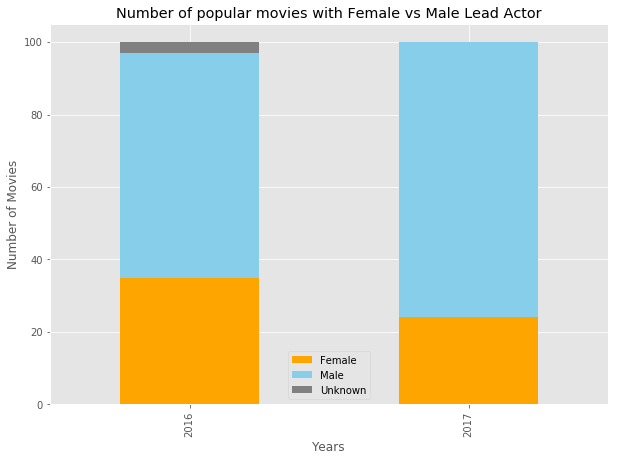

In [83]:
colors = ["orange", "skyblue", "grey"]
gender_pivot.plot.bar(stacked=True, color = colors, figsize=(10,7))
plt.title("Number of popular movies with Female vs Male Lead Actor")
plt.xlabel("Years")
plt.ylabel("Number of Movies")
plt.legend(loc="best")
plt.savefig("Resources/Are movies male centric.png")
plt.show()

### Gender analysis by genre


In [91]:
cast.head()

,actor id,actor name,character,gender,id,movie release year,title
0,417,Ginnifer Goodwin,Judy Hopps (voice),Female,269149,2016,Zootopia
1,10859,Ryan Reynolds,Wade Wilson / Deadpool,Male,293660,2016,Deadpool
2,71580,Benedict Cumberbatch,Stephen Strange / Doctor Strange,Male,284052,2016,Doctor Strange
3,16828,Chris Evans,Steve Rogers / Captain America,Male,271110,2016,Captain America: Civil War
4,880,Ben Affleck,Bruce Wayne / Batman,Male,209112,2016,Batman v Superman: Dawn of Justice


In [89]:
cast_renamed = cast.rename(columns = {"id": "movie id"})

In [95]:
cast_genre_df = pd.merge(movie_genre[["movie id", "genre"]], 
                         cast_renamed[["movie id", "gender", "actor name"]], 
                         on='movie id', how='left')
cast_genre_df.head()

,movie id,genre,gender,actor name
0,269149,Animation,Female,Ginnifer Goodwin
1,269149,Adventure,Female,Ginnifer Goodwin
2,269149,Family,Female,Ginnifer Goodwin
3,269149,Comedy,Female,Ginnifer Goodwin
4,293660,Action,Male,Ryan Reynolds


In [99]:
cast_genre_grouped = cast_genre_df.groupby(["genre","gender"])

gender_genre_analysis = cast_genre_grouped["gender"].count().reset_index(name="count")
gender_genre_analysis_df = pd.DataFrame(gender_genre_analysis)
gender_genre_analysis_df.head()

,genre,gender,count
0,Action,Female,15
1,Action,Male,69
2,Adventure,Female,20
3,Adventure,Male,53
4,Adventure,Unknown,2


In [100]:
genre_pivot = pd.pivot_table(gender_genre_analysis_df, index=["genre"], columns = "gender", values = "count")

In [103]:
genre_pivot.plot.bar(stacked=True, color = colors, figsize=(10,7))
plt.title("Genre of movies with Female vs Male Lead Actor")
plt.xlabel("Genre")
plt.ylabel("Number of Movies - Lead Actor's gender wise")
plt.legend(loc="best")
plt.savefig("Resources/Movies gender analysis by genre.png")
plt.show()

NameError: name 'barWidth' is not defined